In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data')

In [3]:
df.head()
# We see this is an anonomysed data, we don't know what a column represent and all.

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
# Because the KNN classifier predicts the class of a given observation by identifying the observations neares to it,
# the scale of the variable is very important. So, we firstly standadise on a same scale.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis  = 1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [10]:
# create a  featured df

df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [11]:
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [12]:
from sklearn.model_selection import train_test_split

X = df_feat 
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 ,random_state=101)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
Knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
Knn.fit(X_train, y_train)
pred = Knn.predict(X_test)


In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[145  14]
 [ 12 129]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       159
           1       0.90      0.91      0.91       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



0.5

In [25]:
# We wanna use an elbow method to choose the correct K values.

error_rate  = []

for i in range(1,41):
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train, y_train)
    pred_i = Knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

#np.mean([True,False]) = 0.5 
# so, the above code makes sense.

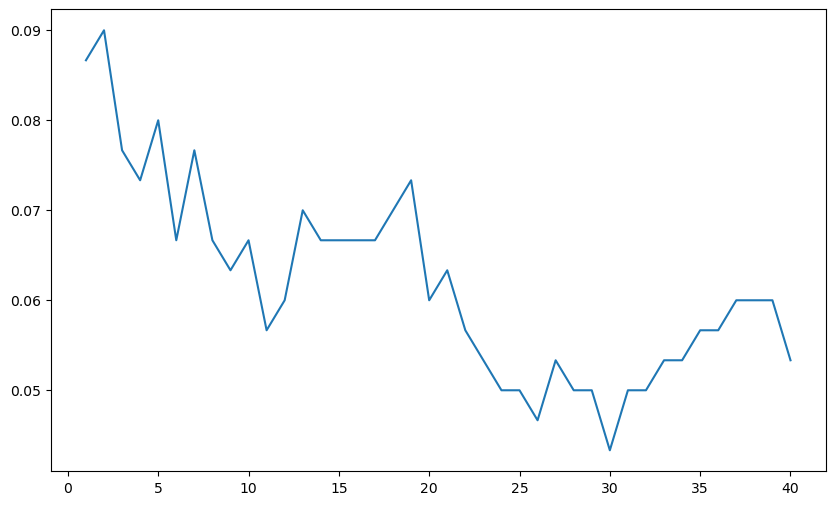

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41), error_rate)

In [35]:
# I will choose 30 as K